# Who has heart diseases?



## Prepare data

In [1]:
# Import libraries
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

### Load data

In [2]:
# DB credentials
postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "heartdisease"

# Start a connection
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

In [3]:
# Get entire table
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

raw = pd.read_sql_query("select * from heartdisease", con=engine)

engine.dispose()

### Data cleaning

In [4]:
# Features
X = raw.iloc[:, :13]
# Target
y = raw.iloc[:, 13]
# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace="?", value=0)
# So that 1: heart disease diagnosis; 0: no diagnosis
y = np.where(y > 0, 0, 1)

In [5]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Fit K-means

### K = 1

In [6]:
# Create model object
k_means = KMeans(n_clusters=1, random_state=123)
# Fit to data
k_means.fit(X)
# Predict labels
y_pred = k_means.predict(X)

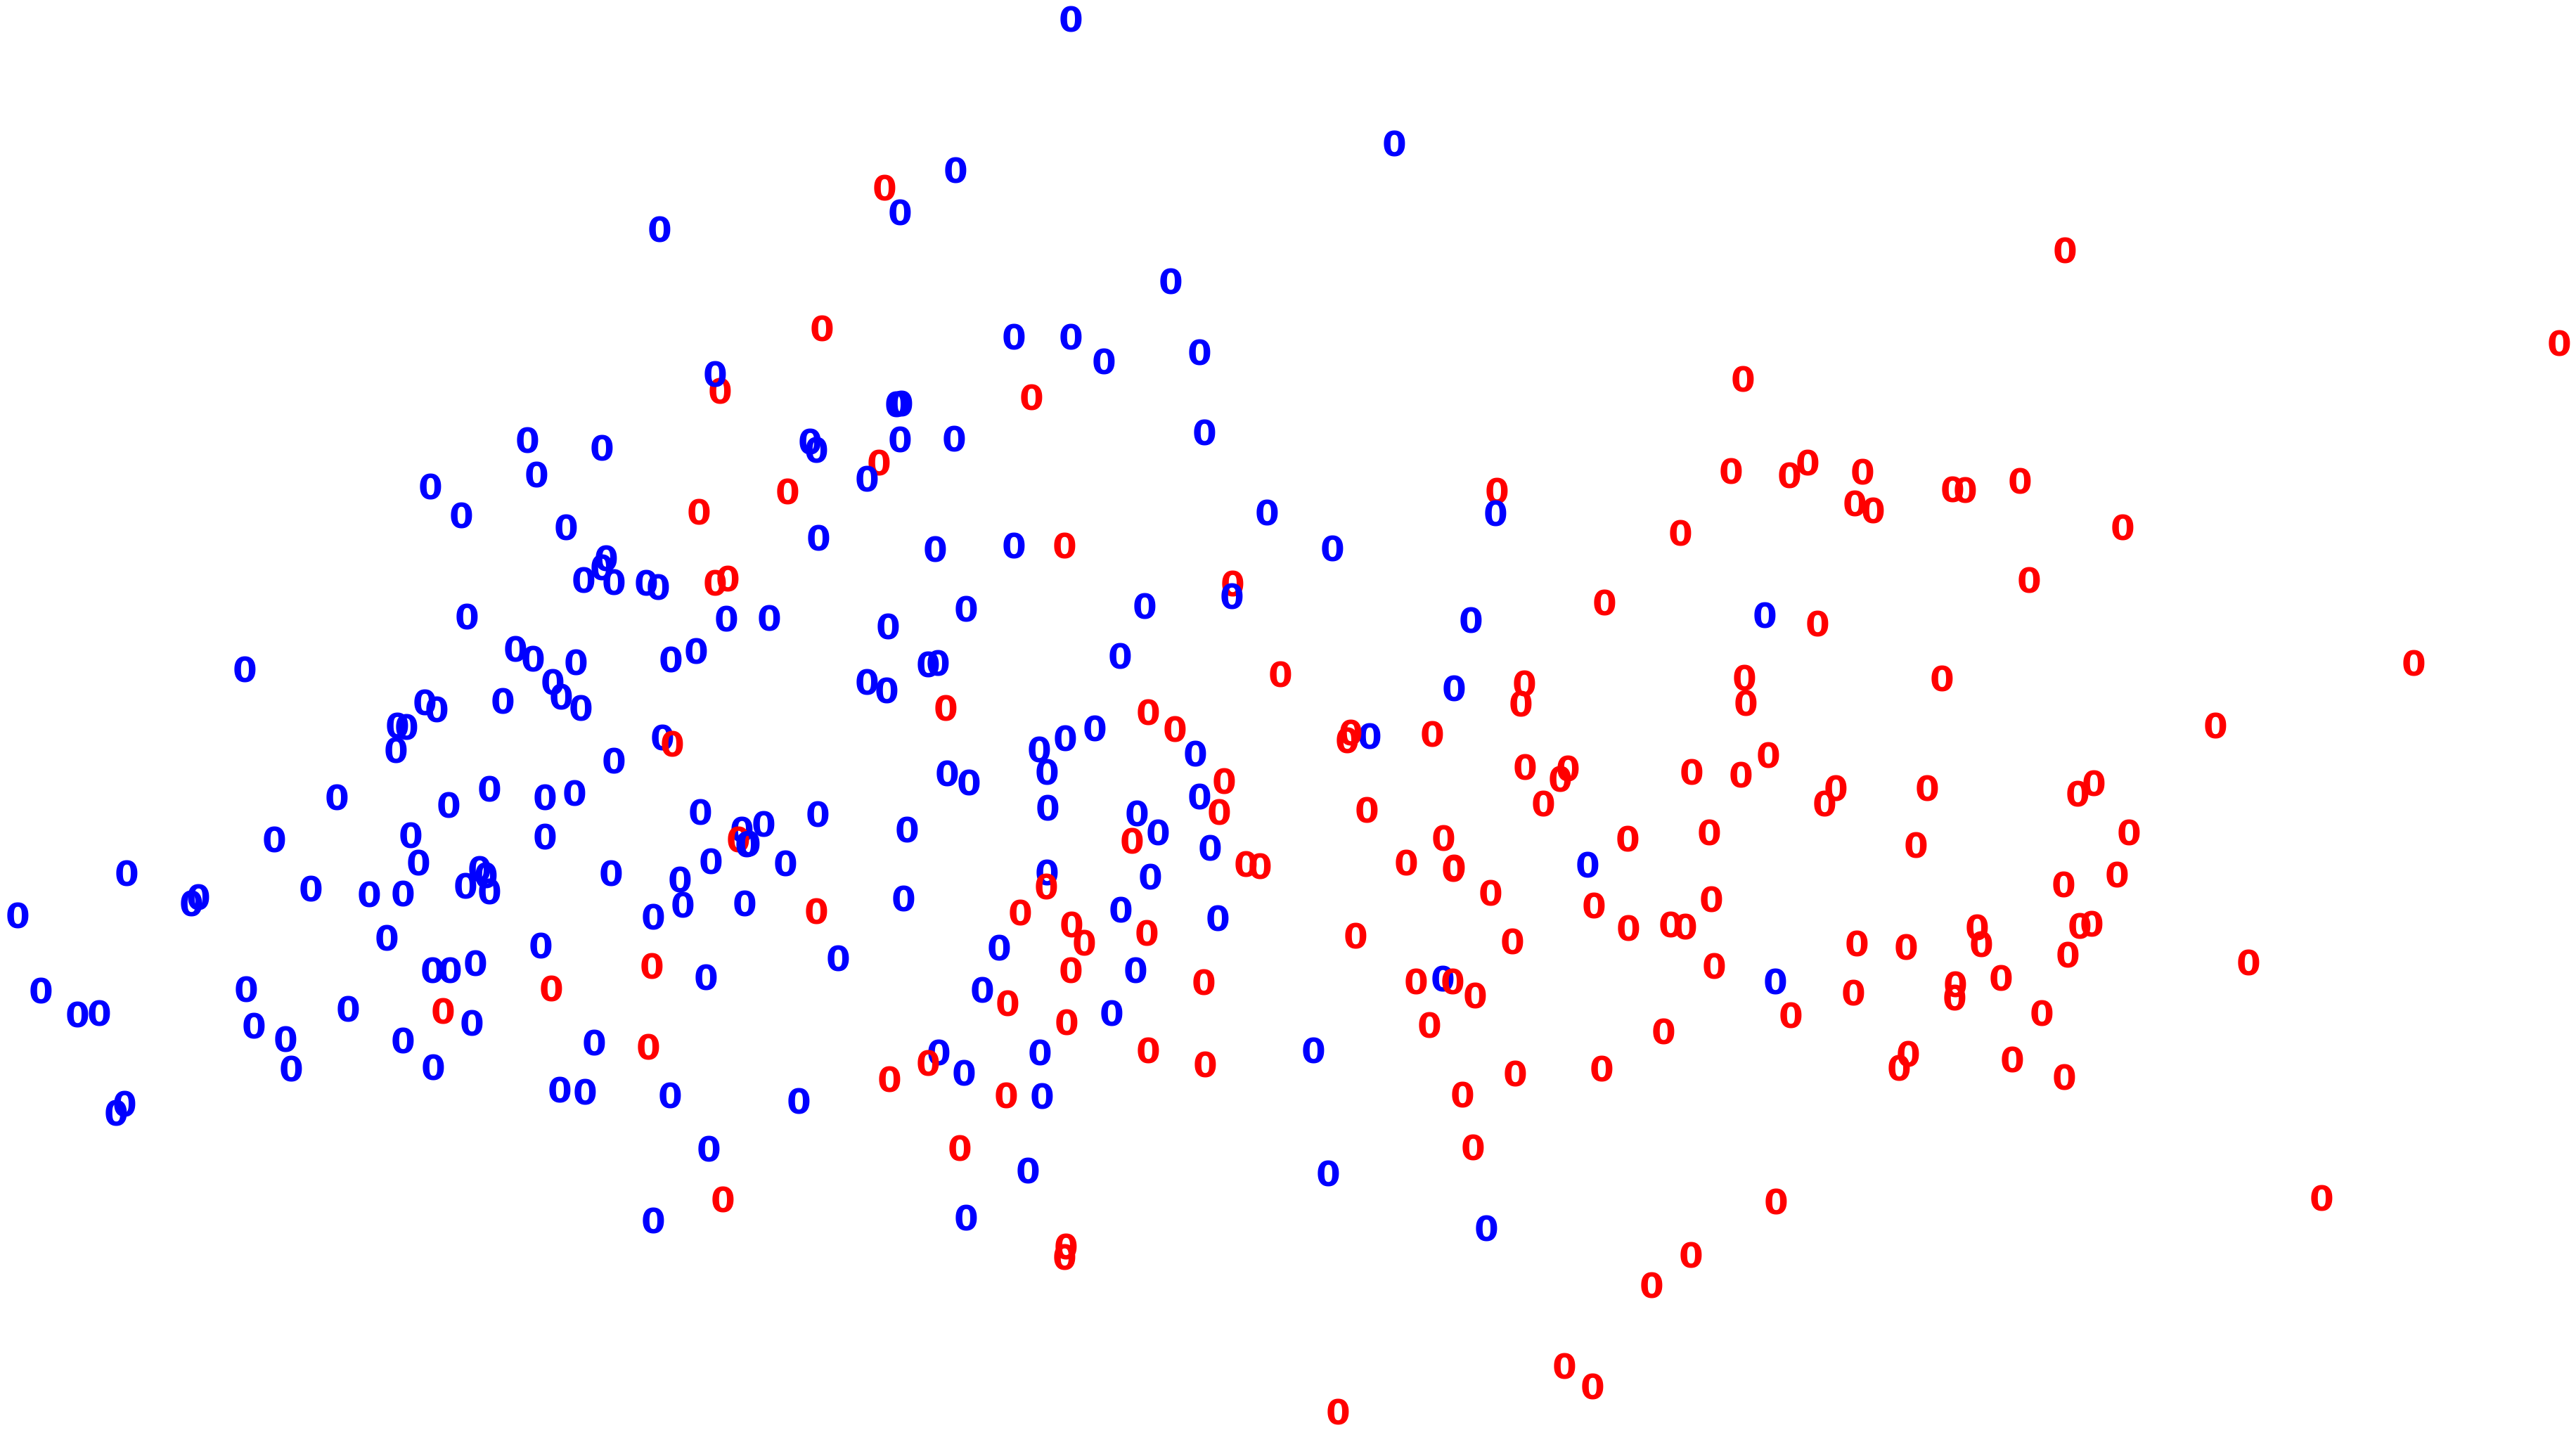

In [7]:
# Plot clusters
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Apparently, one cluster isn't enough to capture to heterogeneity in the data.

### K = 2

In [8]:
# Create model object
k_means = KMeans(n_clusters=2, random_state=123)
# Fit to data
k_means.fit(X)
# Predict labels
y_pred = k_means.predict(X)

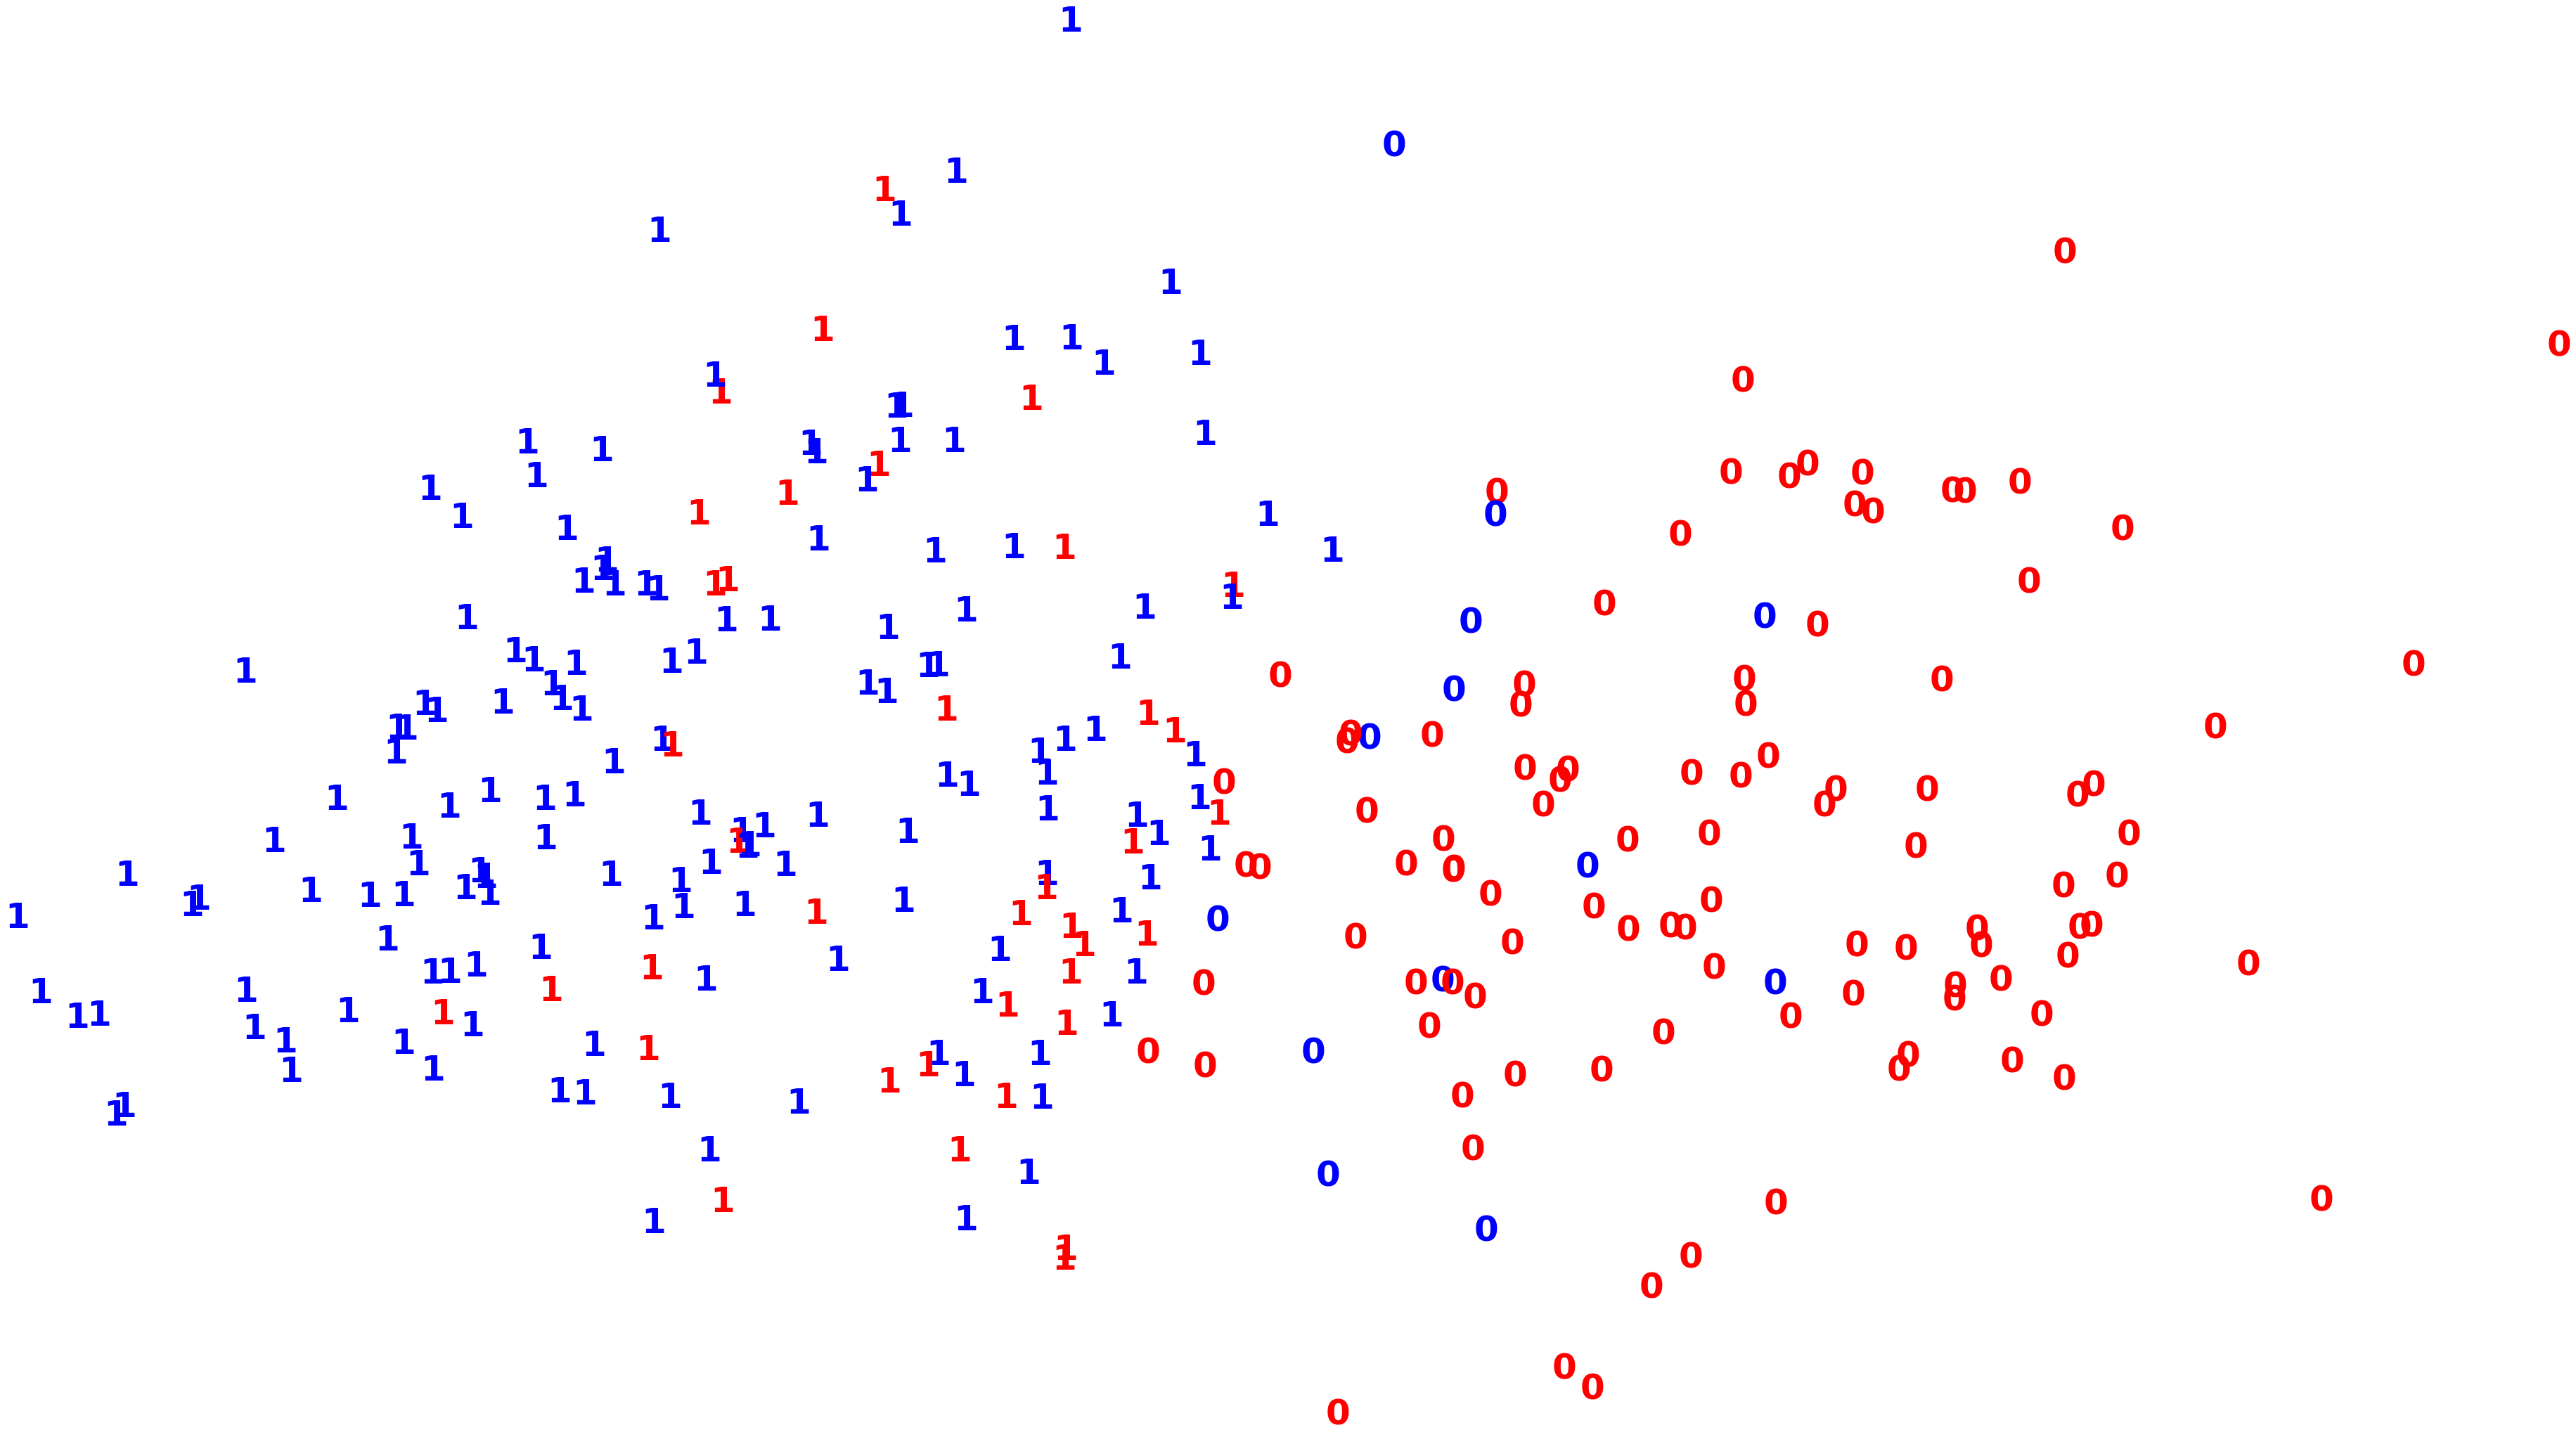

In [9]:
# Plot clusters
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Even though we know patients belong to 2 clusters, K-means still didn't do a great job when K = 2. Lots of patients are mislabeled. 

### K = 3

In [13]:
# Create model object
k_means = KMeans(n_clusters=3, random_state=123)
# Fit to data
k_means.fit(X)
# Predict labels
y_pred = k_means.predict(X)

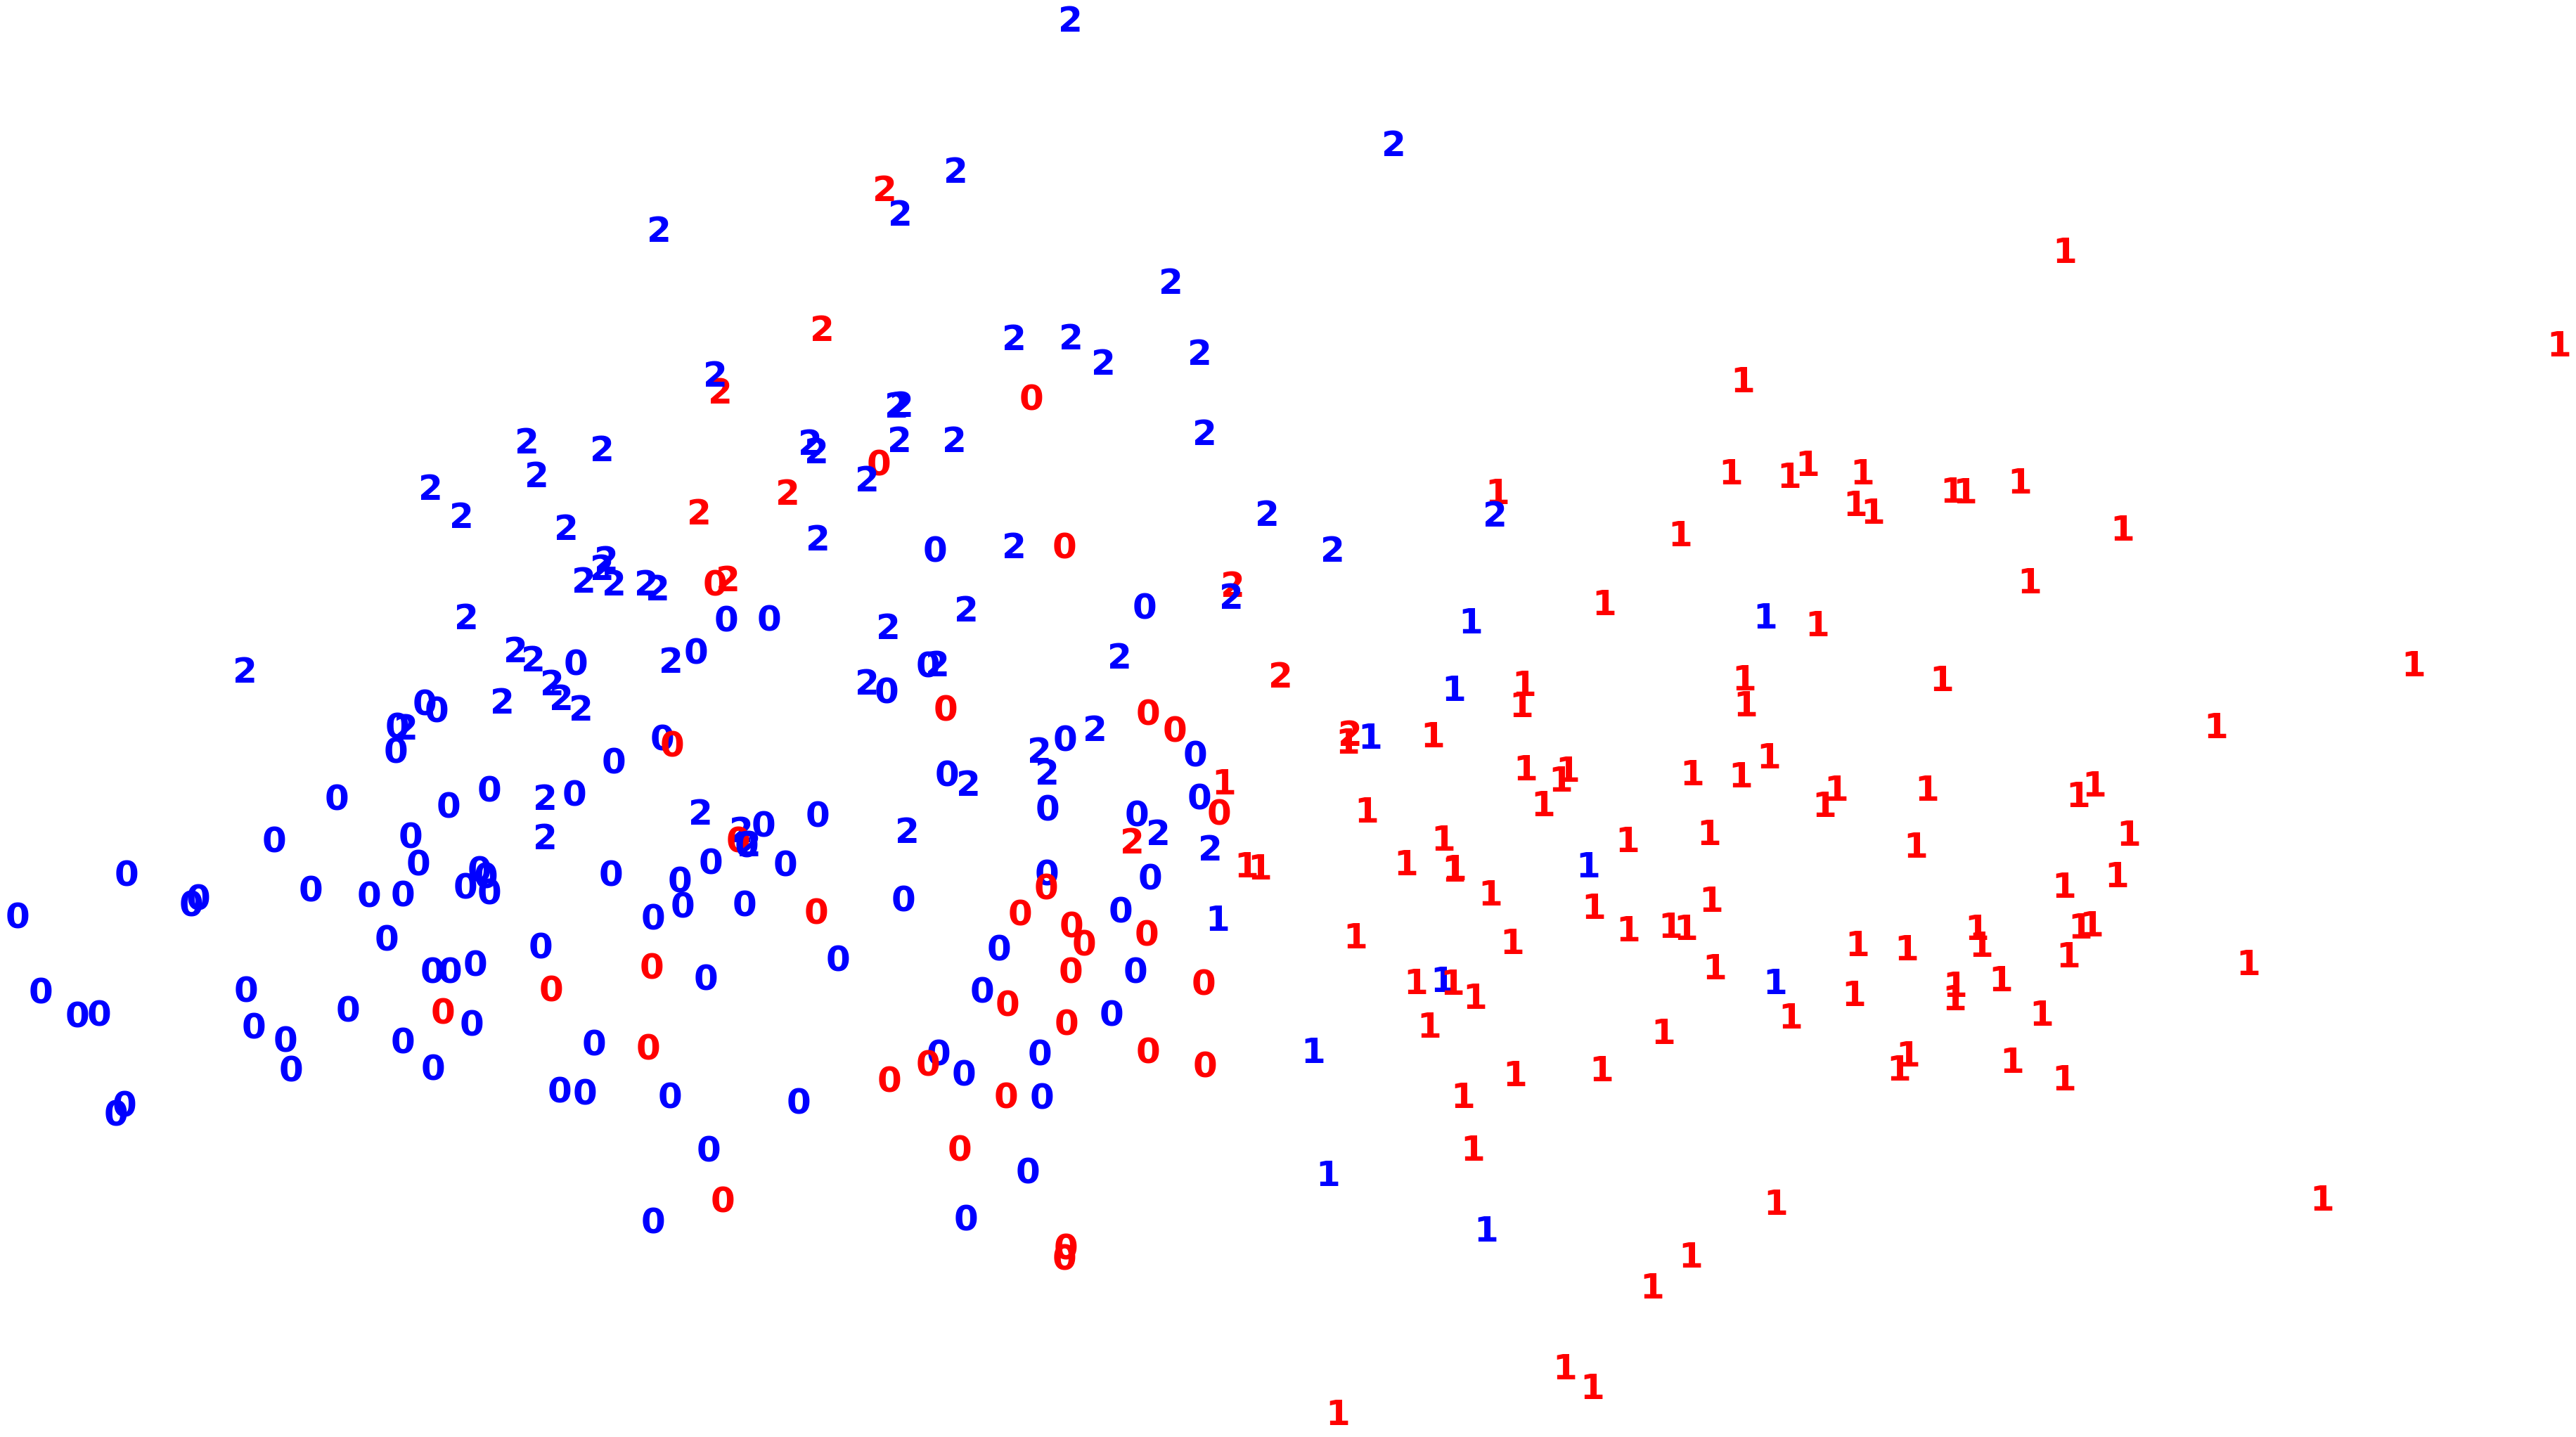

In [14]:
# Plot clusters
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(8,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()